In [1]:
import numpy as np
import matplotlib.pyplot as plt

c:\Users\matim\AppData\Local\Programs\Python\Python311\Lib\site-packages\qutip\__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


Result object with mesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 0


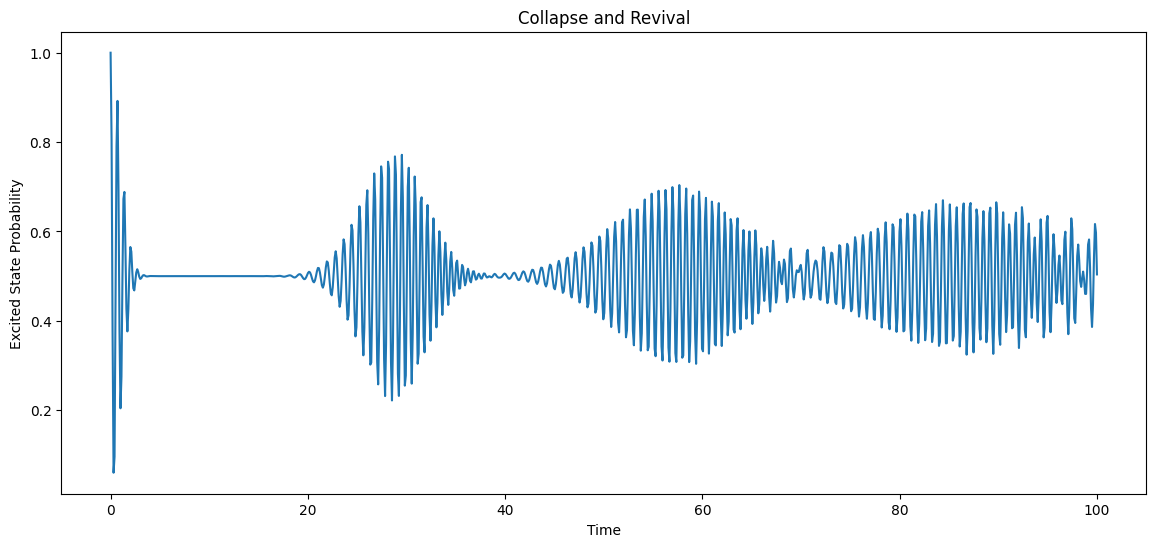

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 40  # Number of photon states in the cavity
wc = 1  # Cavity frequency
wa = 1  # Atom frequency
g = 1.   # Coupling strength

# Operators
a = tensor(qeye(2), destroy(N))  # Cavity destruction operator
sm = tensor(destroy(2), qeye(N))  # Atomic lowering operator
na = sm.dag() * sm  # Atomic number operator
nc = a.dag() * a    # Cavity number operator

# Hamiltonian
H = wc * nc + wa * na + g * (a.dag() * sm + a * sm.dag())

# Initial coherent superposition of the atom
alpha = np.sqrt(20)  # Coherent state amplitude
psi_cavity = coherent(N, alpha) 
#print(psi_cavity)
psi_atom = basis(2, 1)  # Atom starts in the ground state
#print(psi_atom)
psi0 = tensor(psi_atom, psi_cavity)  # Combined initial state
# Time vector
t = np.linspace(0, 100, 1000)
rho = psi0 * psi0.dag()

# Solve the dynamics
output = mesolve(H, rho, t, [], [sm.dag() * sm])
print(output)

# Plot the result
plt.figure(figsize=(14, 6))
plt.plot(t, output.expect[0])
plt.xlabel('Time')
plt.ylabel('Excited State Probability')
plt.title('Collapse and Revival')
plt.show()
